<a href="https://colab.research.google.com/github/babs257/Machine-Learning/blob/main/Titanic_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from sklearn.impute import SimpleImputer
from google.colab import files
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

In [11]:
from IPython.display import HTML
def pretty_print_df(value_counts_):
  "Quick function to display value counts more nicely"
  display(HTML(pd.DataFrame(value_counts_).to_html()))

In [12]:
!gdown 199AjSoVb6t_YtUW5HfNJsFpLdQ6T81ri

Downloading...
From: https://drive.google.com/uc?id=199AjSoVb6t_YtUW5HfNJsFpLdQ6T81ri
To: /content/train.csv
100% 61.2k/61.2k [00:00<00:00, 63.4MB/s]


In [13]:
!gdown 1FJFzeblr5iUDkP3ZhxDcvEzRpOcUDkaf

Downloading...
From: https://drive.google.com/uc?id=1FJFzeblr5iUDkP3ZhxDcvEzRpOcUDkaf
To: /content/test.csv
100% 28.6k/28.6k [00:00<00:00, 47.8MB/s]


In [14]:
!gdown 1kaSZX-2L7SBwWL-1wLx7BKGn-OIw8zXS

Downloading...
From: https://drive.google.com/uc?id=1kaSZX-2L7SBwWL-1wLx7BKGn-OIw8zXS
To: /content/gender_submission.csv
100% 3.26k/3.26k [00:00<00:00, 10.0MB/s]


In [15]:
df = pd.read_csv('train.csv')
display (df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


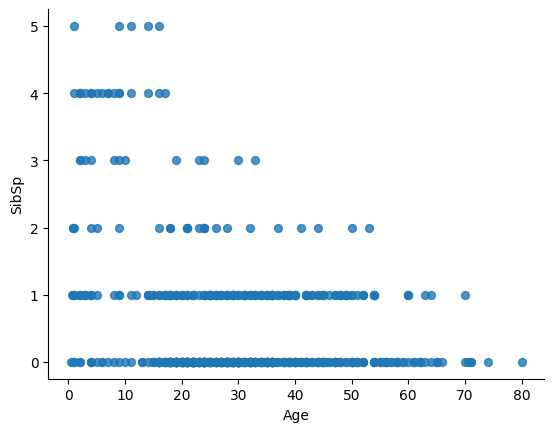

In [22]:
# @title Age vs SibSp

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age', y='SibSp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Survived**

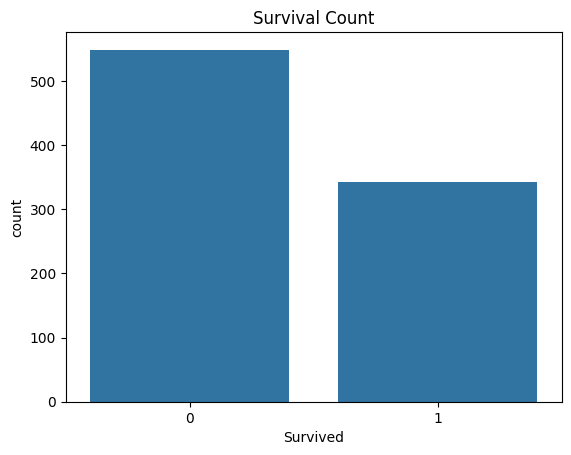

In [16]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

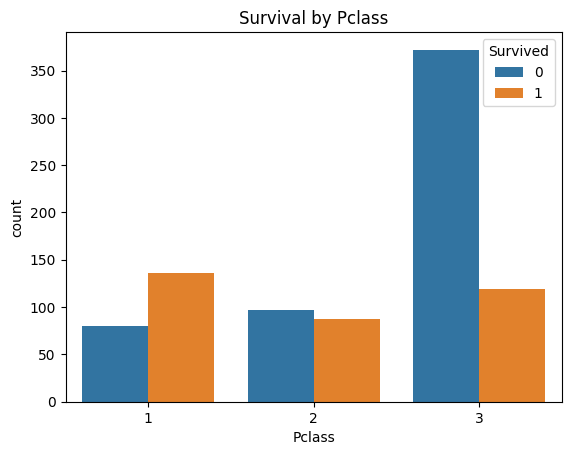

In [17]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Pclass")
plt.show()

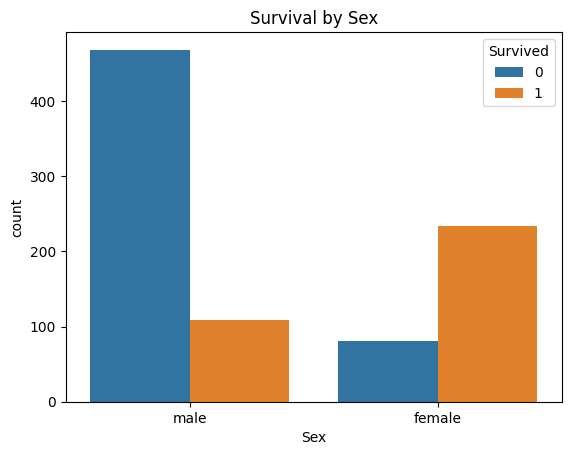

In [18]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Sex")
plt.show()

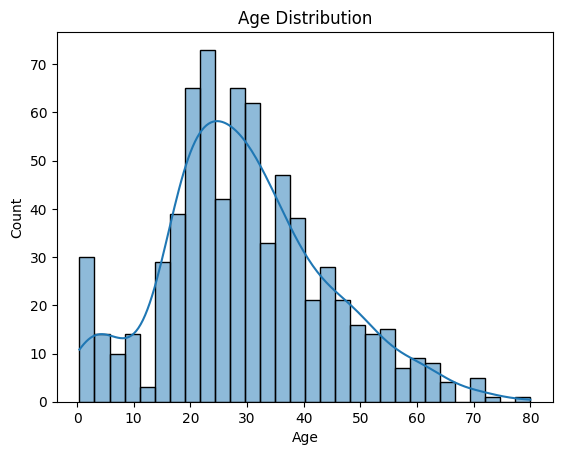

In [19]:
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

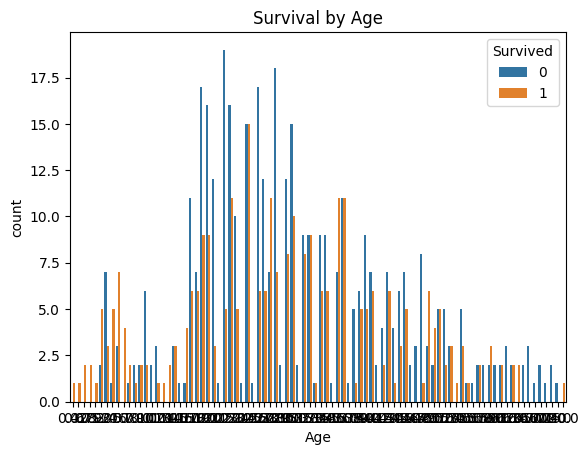

In [21]:
sns.countplot(x='Age', hue='Survived', data=df)
plt.title("Survival by Age")
plt.show()

In [23]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [24]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [25]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [30]:
# Fill missing 'Embarked' values with the mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [26]:
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [27]:
print(f'Is there any duplicate rows? {df.duplicated().any()}')
print(f'There are {len(df)-len(df.drop_duplicates()):,} duplicate rows')

Is there any duplicate rows? True
There are 110 duplicate rows


In [28]:
df = df.drop_duplicates()

In [29]:
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,NaN,Q
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,28.0,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [31]:
df = df.drop(['Cabin'], axis=1)

In [32]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [33]:
categorical_columns = ['Sex', 'Embarked', 'Pclass']
numerical_columns = ['Age', 'Fare','SibSp', 'Parch']

In [36]:
X = df.drop('Survived', axis=1)
y = df['Survived']

Numerical  and number of occurrences for 'Age'


,count
Age,
28.00,125
24.00,29
18.00,25
22.00,24
19.00,23
36.00,22
21.00,22
30.00,22
25.00,20



Numerical  and number of occurrences for 'Fare'


,count
Fare,
13.0000,32
26.0000,30
8.0500,25
10.5000,23
7.7500,21
7.8958,19
7.9250,16
7.7750,16
26.5500,15



Numerical  and number of occurrences for 'SibSp'


,count
SibSp,
0,514
1,201
2,27
4,18
3,14
5,5
8,2



Numerical  and number of occurrences for 'Parch'


,count
Parch,
0,577
1,114
2,75
5,5
3,5
4,4
6,1


In [53]:
df_1 = pd.read_csv('test.csv')
display (df_1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [54]:
X_test = df_1.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [38]:
X_train = X
y_train = y

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct_cat = ColumnTransformer(
    [
        (
            "onehot_categorical",
            OneHotEncoder(),
            categorical_columns,
        ),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False
)
ct_cat.fit(X_train)
encoded_array = ct_cat.transform(X_train)

encoded_col_names= ct_cat.get_feature_names_out()
print(encoded_col_names)
X_train= pd.DataFrame(encoded_array, columns=encoded_col_names)

['Sex_female' 'Sex_male' 'Embarked_C' 'Embarked_Q' 'Embarked_S' 'Pclass_1'
 'Pclass_2' 'Pclass_3' 'Age' 'SibSp' 'Parch' 'Fare']


In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
X_scaled = scaler.fit_transform(X_train[numerical_columns])

In [42]:
X_scaled_column = scaler.get_feature_names_out()
X_train[numerical_columns]= pd.DataFrame(X_scaled, columns=X_scaled_column)

In [44]:
y_train

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
885,0
887,1
888,0
889,1


In [46]:
print(df.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [47]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
lblEncoder_Y = LabelEncoder()
train_encoded_labels = lblEncoder_Y.fit_transform(y_train)
train_encoded_labels

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,

In [48]:
y_train = train_encoded_labels

In [56]:
encoded_array = ct_cat.transform(X_test)

encoded_col_names= ct_cat.get_feature_names_out()
print(encoded_col_names)
X_test= pd.DataFrame(encoded_array, columns=encoded_col_names)

['Sex_female' 'Sex_male' 'Embarked_C' 'Embarked_Q' 'Embarked_S' 'Pclass_1'
 'Pclass_2' 'Pclass_3' 'Age' 'SibSp' 'Parch' 'Fare']


In [57]:
X_scaled_test = scaler.transform(X_test[numerical_columns])

In [58]:
X_test[numerical_columns] = pd.DataFrame(X_scaled_test, columns=X_scaled_column)

In [59]:
X_test

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Age,SibSp,Parch,Fare
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.428248,0.000,0.000000,0.015282
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.585323,0.125,0.000000,0.013663
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.773813,0.000,0.000000,0.018909
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.334004,0.000,0.000000,0.016908
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.271174,0.125,0.166667,0.023984
...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0.000,0.000000,0.015713
414,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.484795,0.000,0.000000,0.212559
415,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.478512,0.000,0.000000,0.014151
416,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0.000,0.000000,0.015713


In [72]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [73]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [76]:
y_predict = pd.DataFrame(y_pred, columns=['Predicted_Survival'])

In [77]:
y_predict

,Predicted_Survival
0,0
1,0
2,0
3,1
4,0
...,...
413,0
414,1
415,0
416,0


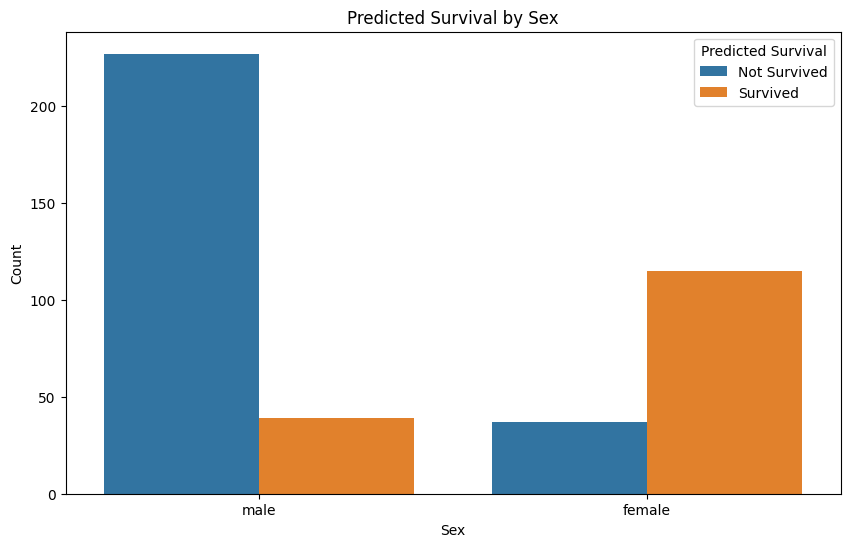

In [86]:
comparison_df = pd.DataFrame({'Sex': df_1['Sex'], 'Predicted_Survival': y_pred})

# Create a countplot to show the distribution of predicted survival by sex
plt.figure(figsize=(10, 6))
sns.countplot(data=comparison_df, x='Sex', hue='Predicted_Survival')
plt.title('Predicted Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Predicted Survival', labels=['Not Survived', 'Survived'])
plt.show()

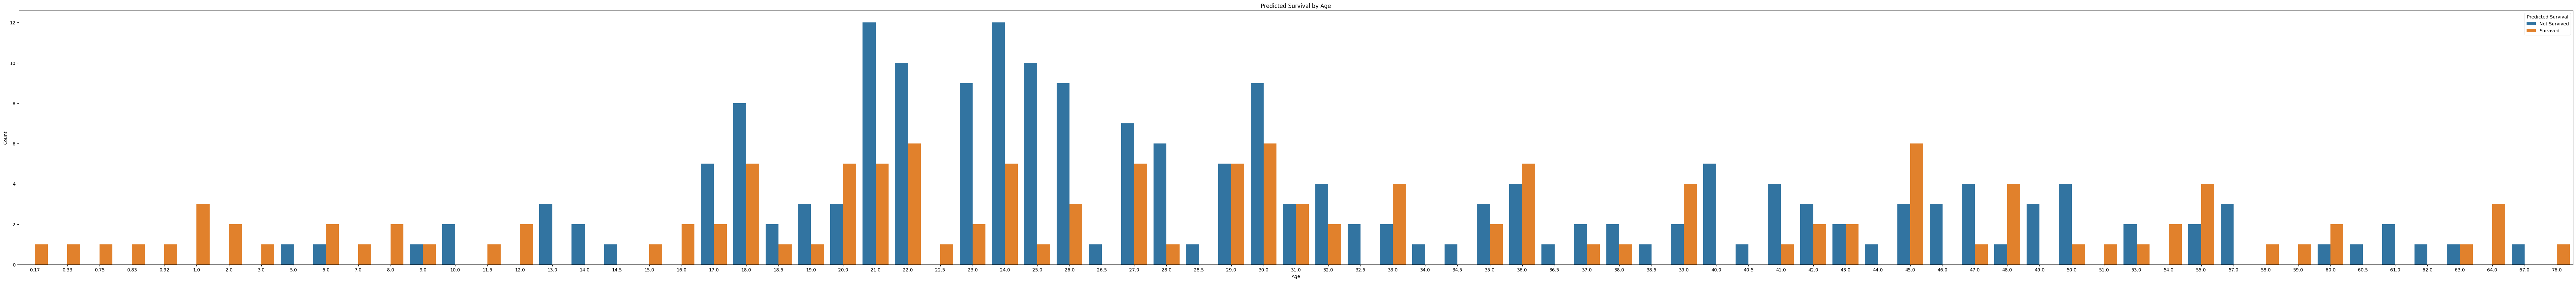

In [90]:
comparison_df = pd.DataFrame({'Age': df_1['Age'], 'Predicted_Survival': y_pred})

# Create a countplot to show the distribution of predicted survival by sex
plt.figure(figsize=(100, 10))
sns.countplot(data=comparison_df, x='Age', hue='Predicted_Survival')
plt.title('Predicted Survival by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Predicted Survival', labels=['Not Survived', 'Survived'])
plt.show()